# outline
1. 
1. 
1. 

日付を変えるか否か

# Non-Linear Regression:Exponential


An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 

## Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

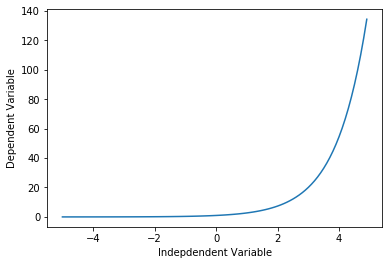

In [2]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("train.csv")
df = df.drop(['Province_State','Date'], axis = 1)
df = df.query('Country_Region == "Japan"')
df = df.rename(columns={'ConfirmedCases':'AccumulatedCases'})
df.head(70)

,Id,Country_Region,AccumulatedCases,Fatalities
9940,14201,Japan,2.0,0.0
9941,14202,Japan,2.0,0.0
9942,14203,Japan,2.0,0.0
9943,14204,Japan,2.0,0.0
9944,14205,Japan,4.0,0.0
...,...,...,...,...
10005,14266,Japan,1468.0,49.0
10006,14267,Japan,1693.0,52.0
10007,14268,Japan,1866.0,54.0
10008,14269,Japan,1866.0,54.0


In [4]:
df.Id = df.Id - 14201
df.head()

,Id,Country_Region,AccumulatedCases,Fatalities
9940,0,Japan,2.0,0.0
9941,1,Japan,2.0,0.0
9942,2,Japan,2.0,0.0
9943,3,Japan,2.0,0.0
9944,4,Japan,4.0,0.0


In [5]:
''''
l = []
for i in range(df.Date):
    s = df.Date.iloc[i]
    t = s[5:].replace('-', '/')
    l.append(t)

df.day = pd.DataFrame(l)
'''''

"'\nl = []\nfor i in range(df.Date):\n    s = df.Date.iloc[i]\n    t = s[5:].replace('-', '/')\n    l.append(t)\n\ndf.day = pd.DataFrame(l)\n"

### Understanding the Dataset

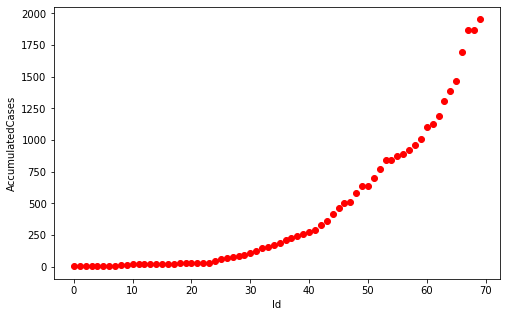

In [6]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Id"].values, df["AccumulatedCases"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
plt.show()

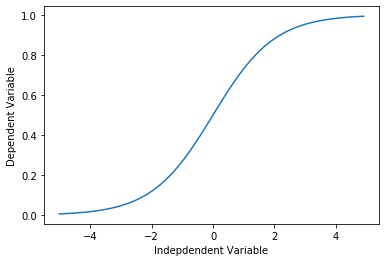

In [7]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Building The Model ###

In [8]:
def exponential(x,Beta1, Beta2):
     y = Beta2*np.exp(Beta1*x)
     #y = Beta1+beta2*np.exp(Beta3*x)
     return y

Lets look at a sample exponential line that might fit with the data:

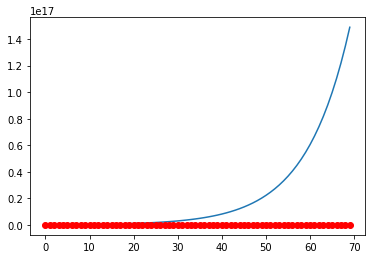

In [9]:
beta_1 = 0.10 #y = Beta2*np.exp(Beta1*x)
    
beta_2 = 1000.0
#logistic function
Y_pred = exponential(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*150000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [10]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

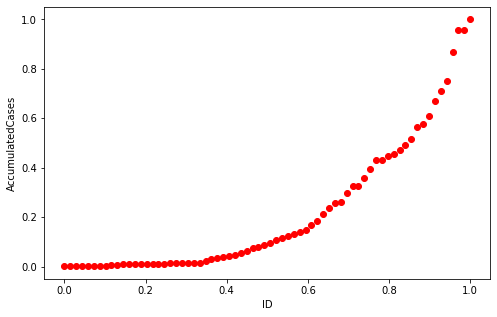

In [11]:
plt.figure(figsize=(8,5))
#x_data, y_data = (df[""].values, df["Date"].values)
plt.plot(xdata, ydata, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('ID')
plt.show()

In [12]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, xdata, ydata)
# pcov shows the range of beta
err = np.sqrt(np.diag(pcov))
#print the final parameters
print(" beta_1 = %f±%f, beta_2 = %f±%f" % (popt[0], err[0], popt[1], err[1]))

 beta_1 = 4.510155±0.081743, beta_2 = 0.011301±0.000834


Now we plot our resulting regression model.

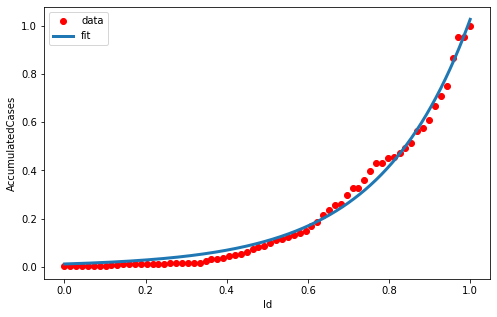

In [13]:
x = np.linspace(1,1257, 1256)
x = x/max(x)
plt.figure(figsize=(8,5))
y = exponential(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')

plt.savefig('ExponentialAnalysis.png')


plt.show()

## Accuracy 

In [91]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(exponential, train_x, train_y)

# predict using test set
y_hat = exponential(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98


--end of this notebook--